In [2]:
## importing essential library
import pandas as pd

In [3]:
## importing file using pandas
file_path = r'C:\Users\suraj\Downloads\deepak\DATA science projects\ML projects\Customer Churn Prediction\customer_churn_large_dataset.xlsx'

data = pd.read_excel(file_path)

In [4]:
## to know shape of data
data.shape

(100000, 9)

In [10]:
# Feature information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [11]:
## to see null values
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [5]:
data.head(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [6]:
df=pd.DataFrame(data)

In [7]:
## to know unique values in churn
data.Churn.unique()

array([0, 1], dtype=int64)

In [8]:
## importing essential library
import matplotlib.pyplot as plt

Churn
0    50221
1    49779
Name: count, dtype: int64


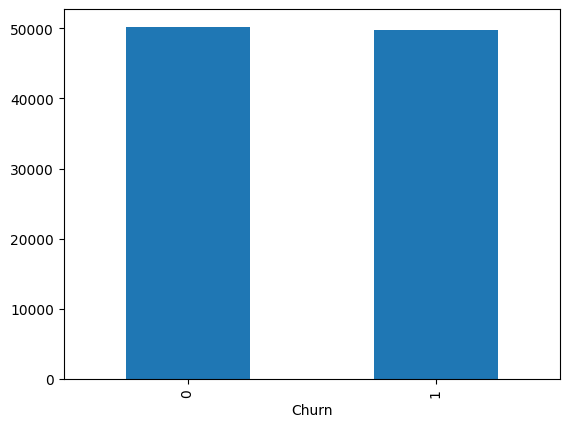

In [9]:
# to see graphical visulization Counting 1 and 0 Value in Churn column
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df['Churn'].map(lambda x: color_wheel.get(x + 1))
print(df.Churn.value_counts())
p=df.Churn.value_counts().plot(kind="bar")

In [13]:
df.Location.unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [14]:
#Change value in country column
df['Location'] = df['Location'].replace(['Los Angeles'],'0')
df['Location'] = df['Location'].replace(['New York'],'1')
df['Location'] = df['Location'].replace(['Miami'],'2')
df['Location'] = df['Location'].replace(['Chicago'],'2')
df['Location'] = df['Location'].replace(['Houston'],'2')


In [15]:
#Change value in gender column
df['Gender'] = df['Gender'].replace(['Female'],'0')
df['Gender'] = df['Gender'].replace(['Male'],'1')

In [16]:
df.head(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,1,0,17,73.36,236,0
1,2,Customer_2,62,0,1,1,48.76,172,0
2,3,Customer_3,24,0,0,5,85.47,460,0
3,4,Customer_4,36,0,2,3,97.94,297,1
4,5,Customer_5,46,0,2,19,58.14,266,0
5,6,Customer_6,67,1,1,15,82.65,456,1
6,7,Customer_7,30,0,2,3,73.79,269,0
7,8,Customer_8,67,0,2,1,97.70,396,1
8,9,Customer_9,20,0,2,10,42.45,150,1
9,10,Customer_10,53,0,0,12,64.49,383,1


In [17]:
df.Gender.unique()

array(['1', '0'], dtype=object)

In [18]:
#convert object data types object to integer
df['Location'] = pd.to_numeric(df['Location'])
df['Gender'] = pd.to_numeric(df['Gender'])
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                          int64
Location                        int64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [19]:
# Convert the float column to integers
df['Monthly_Bill'] = df['Monthly_Bill'].astype(int)


In [20]:
df.head(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,1,0,17,73,236,0
1,2,Customer_2,62,0,1,1,48,172,0
2,3,Customer_3,24,0,0,5,85,460,0
3,4,Customer_4,36,0,2,3,97,297,1
4,5,Customer_5,46,0,2,19,58,266,0


In [21]:
#Remove unnecesary column
df2 = df.drop(['CustomerID' , 'Name'], axis=1)
df2.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,0,17,73,236,0
1,62,0,1,1,48,172,0
2,24,0,0,5,85,460,0
3,36,0,2,3,97,297,1
4,46,0,2,19,58,266,0


In [22]:
## importing essential library
import seaborn as sns

<Axes: >

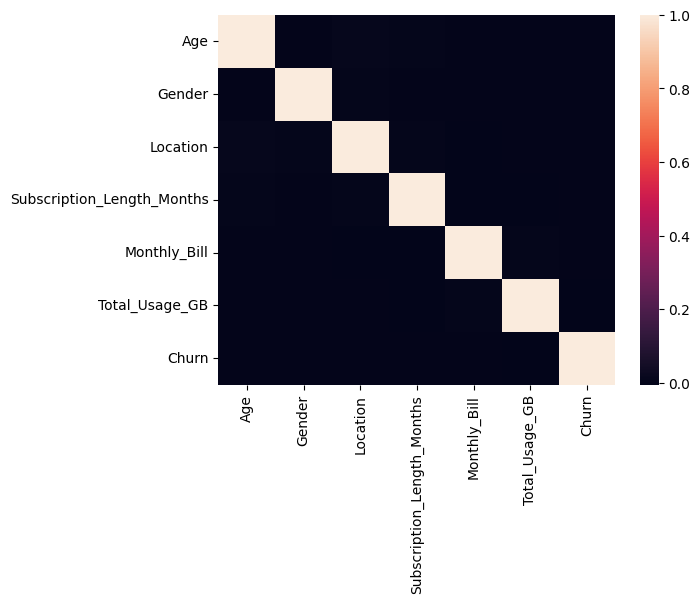

In [23]:
sns.heatmap(df2.corr(), fmt='.2g')

In [24]:
X = df2.drop('Churn', axis=1)
y = df2['Churn']

In [25]:
## test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

In [26]:
##  checking accuracy of different types of classifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 49.57 %


In [27]:
##  checking accuracy of different types of classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 50.135 %


In [28]:
##  checking accuracy of different types of classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 50.05 %


In [29]:
##  checking accuracy of different types of classifier
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")


Accuracy Score : 49.980000000000004 %


In [30]:
## Visualize Random Forest and XGBoost Algorithm because Random Forest and XGBoost Algorithm have the Best Accuracy

In [39]:
#importing classification report and confusion matrix from sklearn
## random forest
from sklearn.metrics import classification_report, confusion_matrix
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.53      0.51      9954
           1       0.50      0.47      0.49     10046

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



Text(0.5, 1.0, 'Accuracy Score: 0.50135')

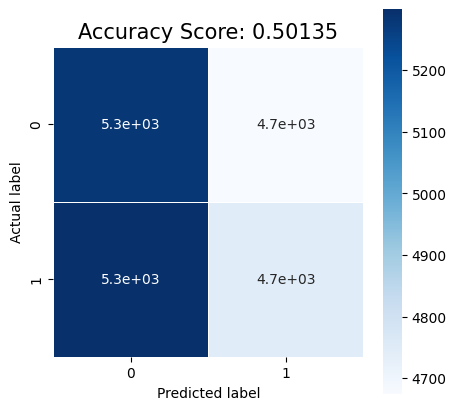

In [33]:
## visulization of confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [35]:
import numpy as np

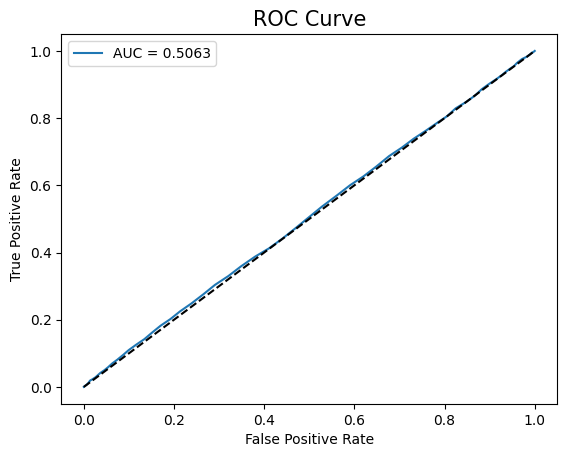

In [36]:

from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [38]:
## xgb boost 
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.53      0.51      9954
           1       0.50      0.47      0.49     10046

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



Text(0.5, 1.0, 'Accuracy Score: 0.5005')

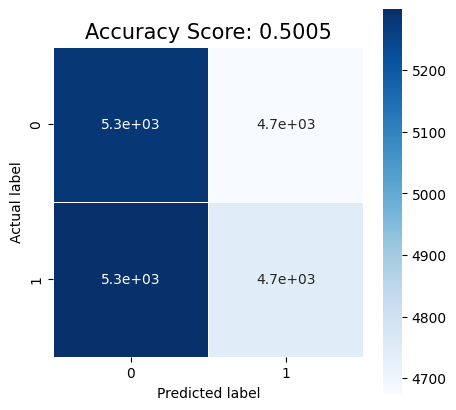

In [40]:
## visulization of confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

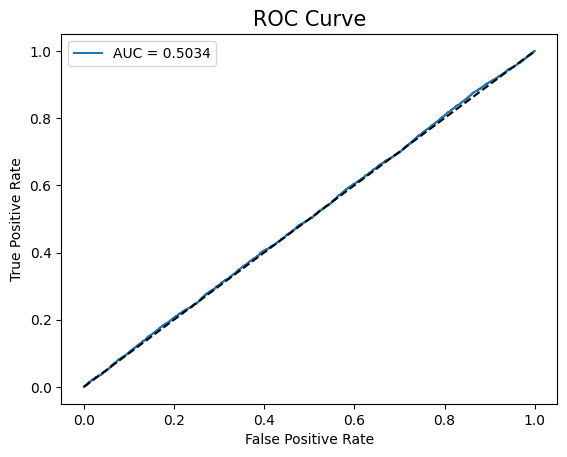

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb_model.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()